In [1]:
import pandas as pd
import numpy as np

# Data loading

In [2]:
data = pd.read_csv("../data/raw/ml-100k/u.data", sep='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
data

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [3]:
GENRES = ["unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", 
              "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
OCCUPATIONS = ["administrator", "artist", "doctor", "educator", "engineer", "entertainment", "executive", "healthcare", "homemaker", "lawyer", 
               "librarian" ,"marketing" ,"none" ,"other" ,"programmer" ,"retired" ,"salesman" ,"scientist" ,"student" ,"technician" ,"writer"]

In [4]:
items = pd.read_csv("../data/raw/ml-100k/u.item", sep='|', header=None, names=["movie_id", "movie_title", "release_date", "video_release_date",
              "IMDb_URL", "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", 
              "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"], encoding='ISO-8859-1')
items

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
items = items.drop(columns=['video_release_date'])
items

,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
users = pd.read_csv("../data/raw/ml-100k/u.user", sep='|', header=None, names=["user_id", "age", "gender", "occupation", "zip_code"], encoding='ISO-8859-1')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


# EDA

Now let's check our data

In [19]:
users.shape

(943, 5)

In [20]:
items.shape

(1682, 23)

We have 943 users and 1682 different movies.

<Axes: xlabel='rating'>

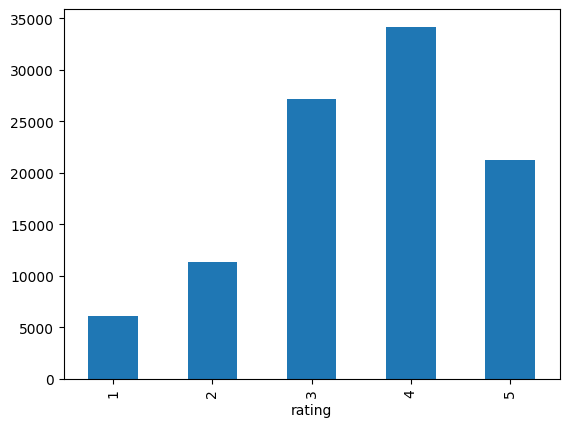

In [8]:
import matplotlib as plot
data['rating'].value_counts().sort_index().plot.bar()

Movies are usually rated with 4 or 3.

<Axes: xlabel='age'>

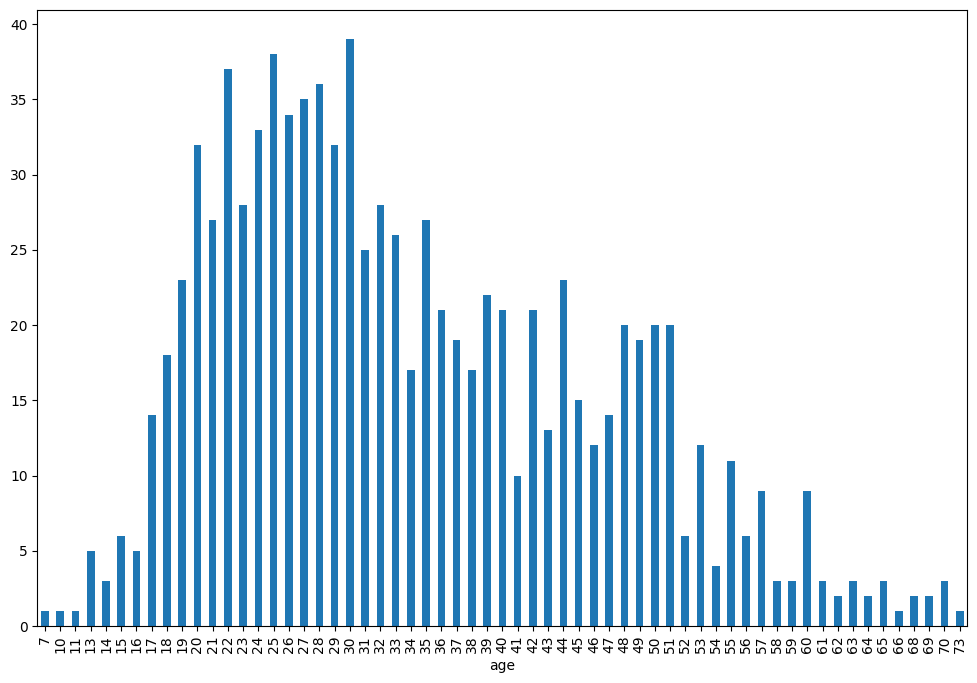

In [9]:
users['age'].value_counts().sort_index().plot.bar(figsize=(12, 8))

Users are mostly aged from 20 to 30.

<Axes: xlabel='gender'>

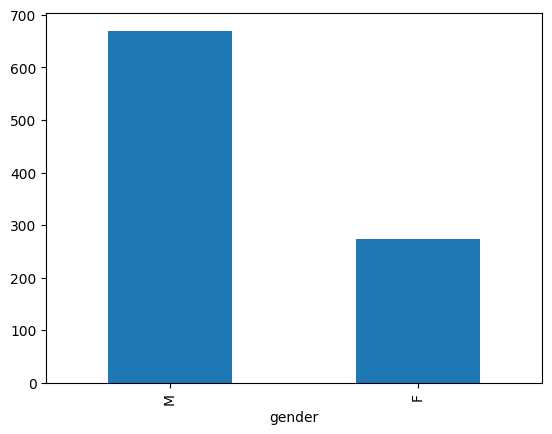

In [10]:
users['gender'].value_counts().plot.bar()

There are more male users than female.

<Axes: xlabel='occupation'>

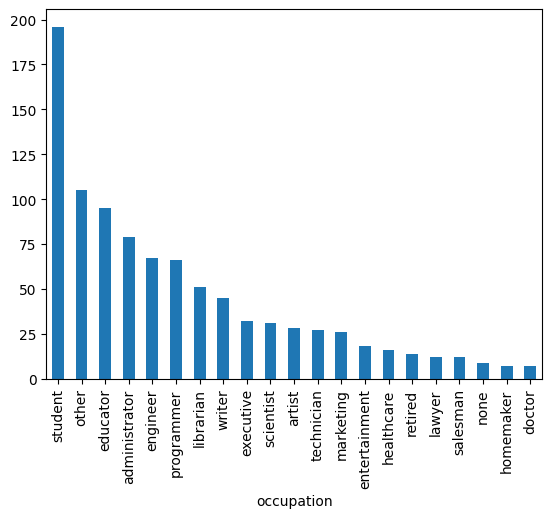

In [11]:
users['occupation'].value_counts().plot.bar()

Student - the most popular occupation among our users.

Now let's check how many films every user watched.

In [12]:
tt = data.groupby('user_id')['movie_id'].apply(list).reset_index(name = 'movies') 
tt['len'] = tt['movies'].apply(len)
tt

,user_id,movies,len
0,1,"[61, 189, 33, 160, 20, 202, 171, 265, 155, 117...",272
1,2,"[292, 251, 50, 314, 297, 290, 312, 281, 13, 28...",62
2,3,"[335, 245, 337, 343, 323, 331, 294, 332, 328, ...",54
3,4,"[264, 303, 361, 357, 260, 356, 294, 288, 50, 3...",24
4,5,"[2, 17, 439, 225, 110, 454, 424, 1, 363, 98, 1...",175
...,...,...,...
938,939,"[931, 106, 258, 1054, 689, 476, 409, 121, 1190...",49
939,940,"[193, 568, 14, 205, 272, 655, 315, 66, 873, 28...",107
940,941,"[147, 124, 117, 181, 993, 258, 7, 475, 257, 15...",22
941,942,"[117, 200, 604, 423, 261, 427, 487, 323, 615, ...",79


In [13]:
min(tt['len'])

20

Every user watched at least 20 films.

In [14]:
max(tt['len'])

737

There is a user, who watched almost half of all films. 

In [15]:
tt['len'].median()

65.0

In [16]:
tt['len'].mean()

106.04453870625663

So, median value is 65 and mean is 106.

In [23]:
tt['len'].mode()[0]

20

So the most common number of films is 20